### Data Sources
##### Downloaded on Oct 17th 2017 (Step 1)
 1.	Net Migration (http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aSM.POP.NETM)
 2.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H

###### Setting up Notebook and importing relevant packages.(Step 2-4)

In [1]:
import pandas as pd 
import matplotlib as mpl 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


###### Steps( 5-9) Read the file, display head , drop footnotes, change column names.

In [2]:
net_mig_df = pd.read_csv('/Users/ssharma/code/nss-ds/data-question-1-shrutijalewar/data/net_migration_minor.csv')
print('Preview of CSV Load :')
print(net_mig_df.head())
print('')
net_mig_rename = net_mig_df.drop('Value Footnotes',axis=1)
print('Preview of Dropped Footnotes :')
print(net_mig_rename.head())
print('')
net_mig_rename = net_mig_rename.rename(columns={'Country or Area': 'Country','Value':'Net_migration'})
print('Preview of Column Rename :')
print(net_mig_rename.head(6))

Preview of CSV Load :
  Country or Area  Year    Value  Value Footnotes
0     Afghanistan  2012   473007              NaN
1     Afghanistan  2007  -677497              NaN
2     Afghanistan  2002   804120              NaN
3     Afghanistan  1997  -379474              NaN
4     Afghanistan  1992  2227474              NaN

Preview of Dropped Footnotes :
  Country or Area  Year    Value
0     Afghanistan  2012   473007
1     Afghanistan  2007  -677497
2     Afghanistan  2002   804120
3     Afghanistan  1997  -379474
4     Afghanistan  1992  2227474

Preview of Column Rename :
       Country  Year  Net_migration
0  Afghanistan  2012         473007
1  Afghanistan  2007        -677497
2  Afghanistan  2002         804120
3  Afghanistan  1997        -379474
4  Afghanistan  1992        2227474
5  Afghanistan  1987       -1484185


In [3]:
net_use_df = pd.read_csv('/Users/ssharma/code/nss-ds/data-question-1-shrutijalewar/data/internet_use_minor.csv', nrows=4495)
print('Preview of CSV Load :')
print(net_use_df.head())
print('')
net_use_rename = net_use_df.drop('Value Footnotes',axis=1)
print('Preview of Dropped Footnotes :')
print(net_use_rename.head())
print('')
net_use_rename = net_use_rename.rename(columns={'Country or Area': 'Country','Value':'Inernet_users_pct'})
print('Preview of Column Rename :')
print(net_use_rename.head(6))



Preview of CSV Load :
  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN

Preview of Dropped Footnotes :
  Country or Area  Year     Value
0     Afghanistan  2014  6.390000
1     Afghanistan  2013  5.900000
2     Afghanistan  2012  5.454545
3     Afghanistan  2011  5.000000
4     Afghanistan  2010  4.000000

Preview of Column Rename :
       Country  Year  Inernet_users_pct
0  Afghanistan  2014           6.390000
1  Afghanistan  2013           5.900000
2  Afghanistan  2012           5.454545
3  Afghanistan  2011           5.000000
4  Afghanistan  2010           4.000000
5  Afghanistan  2009           3.550000


###### Merge the two dataframes as one.(Step 10-12) and see the first 5 and last 5 rows

In [4]:
merge_df = pd.merge(net_use_rename,net_mig_rename, how='outer', on=['Country','Year'])
print('Preview of First 5 :')
print(merge_df.head(5))
print('')
print('Preview of Last 5 :')
print(merge_df.tail(5))

Preview of First 5 :
       Country  Year  Inernet_users_pct  Net_migration
0  Afghanistan  2014           6.390000            NaN
1  Afghanistan  2013           5.900000            NaN
2  Afghanistan  2012           5.454545       473007.0
3  Afghanistan  2011           5.000000            NaN
4  Afghanistan  2010           4.000000            NaN

Preview of Last 5 :
       Country  Year  Inernet_users_pct  Net_migration
6150  Zimbabwe  1982                NaN       141524.0
6151  Zimbabwe  1977                NaN      -101516.0
6152  Zimbabwe  1972                NaN       -30360.0
6153  Zimbabwe  1967                NaN       -27996.0
6154  Zimbabwe  1962                NaN       -10001.0


###### Subset the data frame to only have data for year 2002, 2007, and 2012 (Step 13)

In [5]:
merge_df_3_yr = merge_df.loc[merge_df['Year'].isin([2002,2007,2012])]
print('Preview of 3 year subset:')
print(merge_df_3_yr.head())

Preview of 3 year subset:
        Country  Year  Inernet_users_pct  Net_migration
2   Afghanistan  2012           5.454545       473007.0
7   Afghanistan  2007           1.900000      -677497.0
12  Afghanistan  2002           0.004561       804120.0
17      Albania  2012          54.655959       -91750.0
22      Albania  2007          15.036115      -252926.0


###### Create 3 subsets each for year 2002,2007 and 2012 (Step 14)

In [6]:
merge_df_2002 = merge_df.loc[merge_df['Year']==2002]
print('Preview of year 2002:')
print(merge_df_2002.head())
print('')
merge_df_2007 = merge_df.loc[merge_df['Year']==2007]
print('Preview of year 2007:')
print(merge_df_2007.head())
print('')
merge_df_2012 = merge_df.loc[merge_df['Year']==2012]
print('Preview of year 2012:')
print(merge_df_2012.head())

Preview of year 2002:
        Country  Year  Inernet_users_pct  Net_migration
12  Afghanistan  2002           0.004561       804120.0
27      Albania  2002           0.390081      -175406.0
48      Algeria  2002           1.591641      -205228.0
71      Andorra  2002          11.260469            NaN
90       Angola  2002           0.270377       172594.0

Preview of year 2007:
        Country  Year  Inernet_users_pct  Net_migration
7   Afghanistan  2007           1.900000      -677497.0
22      Albania  2007          15.036115      -252926.0
43      Algeria  2007           9.451191      -357340.0
66      Andorra  2007          70.870000            NaN
85       Angola  2007           3.200000        85286.0

Preview of year 2012:
        Country  Year  Inernet_users_pct  Net_migration
2   Afghanistan  2012           5.454545       473007.0
17      Albania  2012          54.655959       -91750.0
38      Algeria  2012          15.228027      -143268.0
61      Andorra  2012          86.43

###### Which country had the highest percent of internet users in 2012? What was the percentage? Step 15

In [7]:
print('Highest Percent Internet Users 2012 :')
print(merge_df_2012.sort_values('Inernet_users_pct', ascending = False).head(1))

Highest Percent Internet Users 2012 :
      Country  Year  Inernet_users_pct  Net_migration
1868  Iceland  2012            96.2098         -378.0


Highest percent of internet users in 2012 is **Iceland with ~96%**

###### Which country had the lowest% of internet users in 2012? What was the percentage? Step 16

In [8]:
print('Lowest Percent Internet Users :')
print(merge_df_2012.sort_values('Inernet_users_pct', ascending = True).head(1))

Lowest Percent Internet Users :
                          Country  Year  Inernet_users_pct  Net_migration
1066  Dem. People's Rep. of Korea  2012                0.0            NaN


Lowest percent of internet users in 2012 is **Dem. People's Rep. of Kores with  0.0%**

###### Which country had the highest and lowest percent of internet users in 2007 and 2002? What was the percentage? Step 17 -18

In [9]:
print('Highest Percent Internet Users 2007:')
print(merge_df_2007.sort_values('Inernet_users_pct', ascending = False).head(1))

Highest Percent Internet Users 2007:
      Country  Year  Inernet_users_pct  Net_migration
1873  Iceland  2007               90.6         8041.0


In [10]:
print('Highest Percent Internet Users 2007:')
print(merge_df_2007.sort_values('Inernet_users_pct', ascending = True).head(1))

Highest Percent Internet Users 2007:
                          Country  Year  Inernet_users_pct  Net_migration
1071  Dem. People's Rep. of Korea  2007                0.0            NaN


In [11]:
print('Highest Percent Internet Users 2002:')
print(merge_df_2002.sort_values('Inernet_users_pct', ascending = False).head(1))

Highest Percent Internet Users 2002:
      Country  Year  Inernet_users_pct  Net_migration
1878  Iceland  2002              79.12         3894.0


In [12]:
print('Highest Percent Internet Users 2002:')
print(merge_df_2002.sort_values('Inernet_users_pct', ascending = True).head(1))

Highest Percent Internet Users 2002:
                          Country  Year  Inernet_users_pct  Net_migration
1076  Dem. People's Rep. of Korea  2002                0.0            NaN


###### Highest and lowest Net migration in 2012 Step 19 and 20

In [13]:
print('Highest Net Migration 2012 :')
print(merge_df_2012.sort_values('Net_migration', ascending = False).head())
print('Lowest Net Migration 2012 :')
print(merge_df_2012.sort_values('Net_migration', ascending = True).head(10))

Highest Net Migration 2012 :
                                        Country  Year  Inernet_users_pct  \
5112                                High income  2012                NaN   
5650                               OECD members  2012                NaN   
5633                              North America  2012                NaN   
4951  Europe & Central Asia (all income levels)  2012                NaN   
4279                              United States  2012               79.3   

      Net_migration  
5112     15359563.0  
5650     13138424.0  
5633      6183750.0  
4951      5547385.0  
4279      5007887.0  
Lowest Net Migration 2012 :
                                           Country  Year  Inernet_users_pct  \
5395                           Lower middle income  2012                NaN   
5373                           Low & middle income  2012                NaN   
5524                                 Middle income  2012                NaN   
5847                                  

For a country in 2012 the highest net migration is for **United States with 5007887.0** and lowest is for **Syrian Arab Republic with -4029996.0 ** 

###### Scatter Plots Step 21

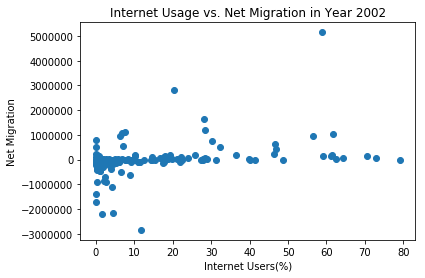

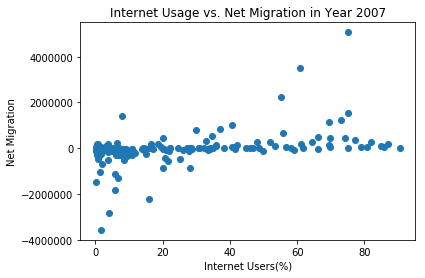

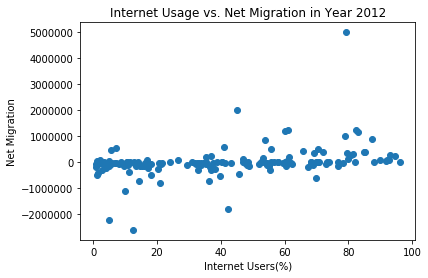

In [14]:
plt.scatter(merge_df_2002.Inernet_users_pct,merge_df_2002.Net_migration)
plt.xlabel('Internet Users(%)')
plt.ylabel('Net Migration')
plt.title('Internet Usage vs. Net Migration in Year 2002')
plt.show()

plt.scatter(merge_df_2007.Inernet_users_pct,merge_df_2007.Net_migration)
plt.xlabel('Internet Users(%)')
plt.ylabel('Net Migration')
plt.title('Internet Usage vs. Net Migration in Year 2007')
plt.show()

plt.scatter(merge_df_2012.Inernet_users_pct,merge_df_2012.Net_migration)
plt.xlabel('Internet Users(%)')
plt.ylabel('Net Migration')
plt.title('Internet Usage vs. Net Migration in Year 2012')
plt.show()

In [15]:
print(merge_df_2012.sort_values('Net_migration', ascending = False).head(40))

                                        Country  Year  Inernet_users_pct  \
5112                                High income  2012                NaN   
5650                               OECD members  2012                NaN   
5633                              North America  2012                NaN   
4951  Europe & Central Asia (all income levels)  2012                NaN   
4279                              United States  2012          79.300000   
4973                             European Union  2012                NaN   
4962    Europe & Central Asia (developing only)  2012                NaN   
4140                                     Turkey  2012          45.130000   
4940                                  Euro area  2012                NaN   
6053                        Upper middle income  2012                NaN   
2299                                    Lebanon  2012          61.249786   
1513                                    Germany  2012          82.349998   
3043        

**Step 22 Observations:**
Internet usage has increased in the 10 years from 2002 to 2012 the world over. Net migration the world over is generally negative for countries and categories with less internet usage. The categories with higher proportion of internet use also have generally positive net migrations indicating free mobility. That may possibly be because of more *liberal visa/travel regulations and trade regulations*. These regions/countries have **freely available regional information and opportunity**. This is purely a hypothesis at this point proposed as a broad generalization that seems to sit well with the categories and countries observed in the list of top 40. 

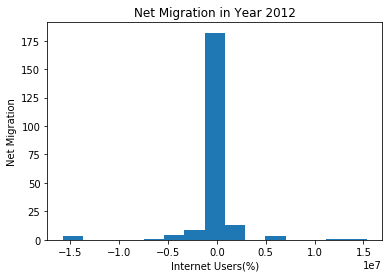

In [16]:
net_mig_2012 = net_mig_rename.loc[net_mig_rename['Year']== 2012]
plt.hist(net_mig_2012.Net_migration, bins=15)
plt.xlabel('Internet Users(%)')
plt.ylabel('Net Migration')
plt.title('Net Migration in Year 2012')
plt.show()

###### Look at the distribution of Internet Use for 2012. Is it unimodal? (Step 23)
**Yes**

Step 24

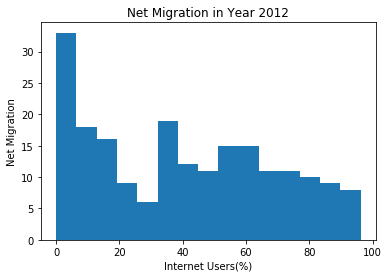

In [17]:
net_use_2012 = net_use_rename.loc[net_use_rename['Year']== 2012]
plt.hist(net_use_2012.Inernet_users_pct, bins=15)
plt.xlabel('Internet Users(%)')
plt.ylabel('Net Migration')
plt.title('Net Migration in Year 2012')
plt.show()

###### Look at the distribution of Internet Use for 2012. Is it unimodal? step 24
**No. It looks more bimodal in distribution.**

###### Step 25 Top 5 countries for Internet use

In [18]:
print('Top 5 countries for Internet use :')
print(merge_df_2012.sort_values('Inernet_users_pct', ascending = False).head(5))

Top 5 countries for Internet use :
          Country  Year  Inernet_users_pct  Net_migration
1868      Iceland  2012          96.209800         -378.0
3018       Norway  2012          94.649978       235665.0
3827       Sweden  2012          93.179988       272626.0
2882  Netherlands  2012          92.859992       110006.0
1085      Denmark  2012          92.260012        96839.0


###### Step 26 Top 5 countries for Internet use across the three years

In [19]:
merge_df_3_yr_top5 = merge_df_3_yr.loc[merge_df_3_yr['Country'].isin(['Iceland','Norway','Sweden','Netherlands','Denmark'])]
print('Top 5 Internet Countries of 2012 Across Three Years :')
print(merge_df_3_yr_top5)

Top 5 Internet Countries of 2012 Across Three Years :
          Country  Year  Inernet_users_pct  Net_migration
1085      Denmark  2012          92.260012        96839.0
1090      Denmark  2007          85.030000        87989.0
1095      Denmark  2002          64.250000        46306.0
1868      Iceland  2012          96.209800         -378.0
1873      Iceland  2007          90.600000         8041.0
1878      Iceland  2002          79.120000         3894.0
2882  Netherlands  2012          92.859992       110006.0
2887  Netherlands  2007          85.820000        55674.0
2892  Netherlands  2002          61.290000       144620.0
3018       Norway  2012          94.649978       235665.0
3023       Norway  2007          86.930000       174001.0
3028       Norway  2002          72.840000        67400.0
3827       Sweden  2012          93.179988       272626.0
3832       Sweden  2007          82.010000       262453.0
3837       Sweden  2002          70.570000       141723.0


###### Seaborn facet grid plot for top 5 internet usage step 27

In [20]:
import seaborn as sns

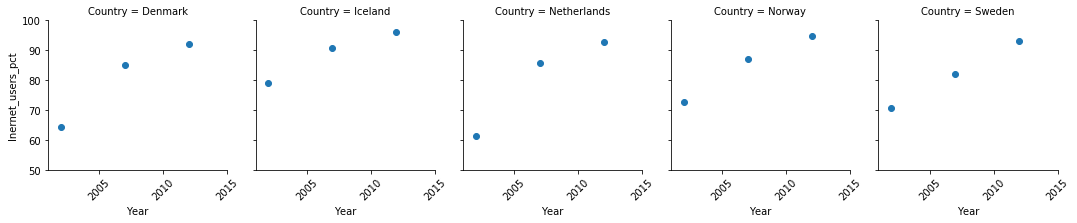

In [21]:
g = sns.FacetGrid(merge_df_3_yr_top5, col='Country') 
g.map(plt.scatter,'Year','Inernet_users_pct',)
plt.xlim(2001, 2015) 
plt.ylim(50, 100)
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)


###### 5 countries with the lowest 2012 internet usage Step 28

In [22]:
print('Bottom 5 countries for Internet use :')
print(merge_df_2012.sort_values('Inernet_users_pct', ascending = True).head(5))

Bottom 5 countries for Internet use :
                          Country  Year  Inernet_users_pct  Net_migration
1066  Dem. People's Rep. of Korea  2012             0.0000            NaN
1258                      Eritrea  2012             0.8000      -160001.0
4021                  Timor-Leste  2012             0.9147       -50004.0
2816                      Myanmar  2012             1.0691      -474278.0
625                       Burundi  2012             1.2200        40000.0


In [23]:
merge_df_3_yr_bottom5 = merge_df_3_yr.loc[merge_df_3_yr['Country'].isin(["Dem. People's Rep. of Korea",'Eritrea','Timor-Leste','Myanmar','Burundi'])]
print('Bottom 5 Internet Countries of 2012 Across Three Years :')
print(merge_df_3_yr_bottom5)

Bottom 5 Internet Countries of 2012 Across Three Years :
                          Country  Year  Inernet_users_pct  Net_migration
625                       Burundi  2012           1.220000        40000.0
630                       Burundi  2007           0.700000       163733.0
635                       Burundi  2002           0.118228       112532.0
1066  Dem. People's Rep. of Korea  2012           0.000000            NaN
1071  Dem. People's Rep. of Korea  2007           0.000000            NaN
1076  Dem. People's Rep. of Korea  2002           0.000000            NaN
1258                      Eritrea  2012           0.800000      -160001.0
1263                      Eritrea  2007           0.410000      -160001.0
1264                      Eritrea  2002           0.227090       110001.0
2816                      Myanmar  2012           1.069100      -474278.0
2821                      Myanmar  2007           0.217128     -1466799.0
2826                      Myanmar  2002           0.000

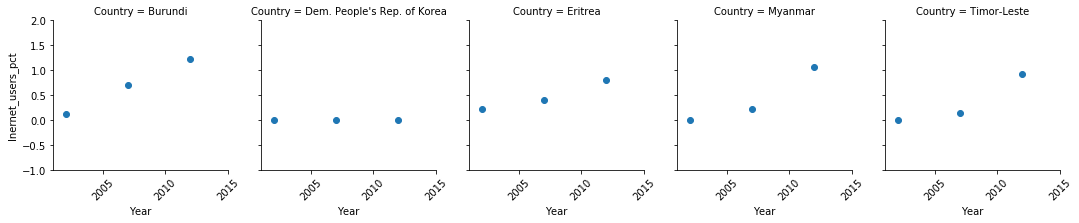

In [24]:
g = sns.FacetGrid(merge_df_3_yr_bottom5, col='Country') 
g.map(plt.scatter,'Year','Inernet_users_pct',)
plt.xlim(2001, 2015) 
plt.ylim(-1, 2)
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)


###### Seaborn plots for Top 5 for 2012 and bottom 5 for 2012 for net migration to look at 10-year trends. Step 29

In [25]:
print('Top 5 countries for Net Migration :')
print(merge_df_2012.sort_values('Net_migration', ascending = False).head(14))

Top 5 countries for Net Migration :
                                        Country  Year  Inernet_users_pct  \
5112                                High income  2012                NaN   
5650                               OECD members  2012                NaN   
5633                              North America  2012                NaN   
4951  Europe & Central Asia (all income levels)  2012                NaN   
4279                              United States  2012          79.300000   
4973                             European Union  2012                NaN   
4962    Europe & Central Asia (developing only)  2012                NaN   
4140                                     Turkey  2012          45.130000   
4940                                  Euro area  2012                NaN   
6053                        Upper middle income  2012                NaN   
2299                                    Lebanon  2012          61.249786   
1513                                    Germany  201

###### Top 5 countries for Net Migration : 'United States’,’Turkey’,’Lebanon’,’Germany’,'Oman'

In [26]:
merge_df_3_yr_top5_mig = merge_df_3_yr.loc[merge_df_3_yr['Country'].isin(['United States','Turkey','Lebanon','Germany','Oman'])]
print('Top 5 Net Migration Countries of 2012 Across Three Years :')
print(merge_df_3_yr_top5_mig)

Top 5 Net Migration Countries of 2012 Across Three Years :
            Country  Year  Inernet_users_pct  Net_migration
1513        Germany  2012          82.349998      1249998.0
1518        Germany  2007          75.160000        31640.0
1523        Germany  2002          48.820000         1217.0
2299        Lebanon  2012          61.249786      1250000.0
2304        Lebanon  2007          18.740000       183370.0
2309        Lebanon  2002           7.000000       550110.0
3043           Oman  2012          60.000000      1211000.0
3048           Oman  2007          16.680000       185500.0
3053           Oman  2002           6.873396        40452.0
4140         Turkey  2012          45.130000      2000003.0
4145         Turkey  2007          28.630000       -50000.0
4150         Turkey  2002          11.380000      -100002.0
4279  United States  2012          79.300000      5007887.0
4284  United States  2007          75.000000      5070253.0
4289  United States  2002          58.785

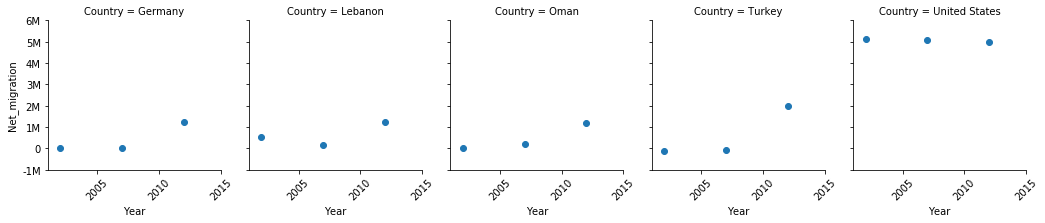

In [27]:
g = sns.FacetGrid(merge_df_3_yr_top5_mig, col='Country') 
g.map(plt.scatter,'Year','Net_migration',)
plt.xlim(2001, 2015)
plt.ylim(-1000000, 6000000) 
plt.yticks([6000000,5000000,4000000,3000000,2000000,1000000,0,-1000000],['6M','5M','4M','3M','2M','1M','0','-1M'])
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)


In [28]:
print('Bottom 5 countries for Net Migration :')
print(merge_df_2012.sort_values('Net_migration', ascending = True).head(20))

Bottom 5 countries for Net Migration :
                                            Country  Year  Inernet_users_pct  \
5395                            Lower middle income  2012                NaN   
5373                            Low & middle income  2012                NaN   
5524                                  Middle income  2012                NaN   
5847                                     South Asia  2012                NaN   
5325   Least developed countries: UN classification  2012                NaN   
5944                           Syrian Arab Republic  2012                NaN   
4878          East Asia & Pacific (developing only)  2012                NaN   
5513   Middle East & North Africa (developing only)  2012                NaN   
5101         Heavily indebted poor countries (HIPC)  2012                NaN   
1893                                          India  2012          12.580061   
294                                      Bangladesh  2012           5.000000   
5

###### Bottom 5 countries for Net Migration in 2012 'Syrian Arab Republic','India','Bangladesh','China','Pakistan'

In [29]:
merge_df_3_yr_bottom5_mig = merge_df_3_yr.loc[merge_df_3_yr['Country'].isin(['Syrian Arab Republic','India','Bangladesh','China','Pakistan'])]
print('Bottom 5 Net Migration Countries of 2012 Across Three Years :')
print(merge_df_3_yr_bottom5_mig)

Bottom 5 Net Migration Countries of 2012 Across Three Years :
                   Country  Year  Inernet_users_pct  Net_migration
294             Bangladesh  2012           5.000000     -2226481.0
299             Bangladesh  2007           1.800000     -3570954.0
304             Bangladesh  2002           0.139920     -1700003.0
827                  China  2012          42.300117     -1800000.0
832                  China  2007          16.000000     -2202103.0
837                  China  2002           4.595704     -2144051.0
1893                 India  2012          12.580061     -2598218.0
1898                 India  2007           3.950000     -2829378.0
1903                 India  2002           1.537876     -2206411.0
3063              Pakistan  2012           9.960000     -1081918.0
3068              Pakistan  2007           6.800000     -1296372.0
3073              Pakistan  2002           2.577427      -896486.0
5944  Syrian Arab Republic  2012                NaN     -4029996.0


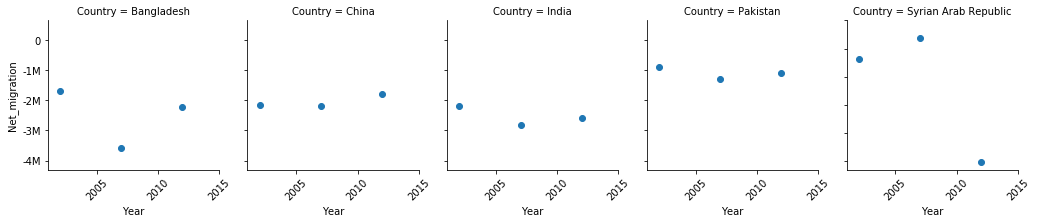

In [30]:
g = sns.FacetGrid(merge_df_3_yr_bottom5_mig, col='Country') 
g.map(plt.scatter,'Year','Net_migration',)
plt.xlim(2001, 2015) 
plt.yticks([-4000000,-3000000,-2000000,-1000000,0,1000000],['-4M','-3M','-2M','-1M','0','1M'])
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

###### Step 30 
Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

Looking at the net migration data, following observations break a trend or are significantly out of line for the trend.

1. **Bangladesh in 2007** shows a increased deficit of about a million in net migration. It has always been negative but there is an additional exodus of about ~1 million in that year. This time frame correlates with the time of political unrest that began in the end of 2006 and continued till 2008. Dissolution of civil government was followed by severe human rights violations, rise of extremist militancy, corruption and curbed freedom of expression. 

2. **Syria in 2012** shows a steep drop from 0.3 million to -4million. This correlates with the political crisis and civil war in the region that began and escalated since then. Interestingly enough for the same year you see a **corresponding increase in net migration** other peaceful countries of the region namely **Turkey, Lebanon and Germany** that is somewhat more than expected trend.
3. Penetrance on internet has been on the rise the world over. More people use internet now than 10 years back.
4. There seems to be a **bigger jump in the percent of internet users from 2002 to 2007**. This in part seems to corelate with **introduction of smartphones**. Apple launched its first iPhone in 2007 and the first android phone is launched in 2008. The bigger jump may in part be due to internet going mobile!

###### In class practice 2:

In [31]:
from scipy import stats 
print(stats.__doc__) 


Statistical functions (:mod:`scipy.stats`)

.. module:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   dgamma            -- Double Gamma
   dweibull          -- Double Weibull
   erlang            -- Er

###### Create a set of 500 randomly generated numbers called iq_scores (mean = 100, sd = 15)

In [34]:
sigma = 15
mu = 100
iq_scores = np.random.normal(mu, sigma, 500)
print(iq_scores)

[  80.89784133  100.1206866    89.37007793  100.82306785   81.13534118
   92.22671032  114.59342804   80.53042375  117.58627239   94.92793337
  118.74749251   79.20514267   97.7961216   115.52710228   82.36682776
   93.49352054  125.62255369   99.87456954  124.43847487   88.60145227
   88.48625889   72.23875071   91.75102738   86.09309033  109.96563037
  103.37675113  107.33323876  101.63754801   84.63195186  116.21664902
  113.90342761  108.69316062  115.95486326   77.74086363  114.87160822
   92.48658444   78.29163765   97.55224715  110.85945826   78.55700158
   92.50049996   98.07192344  110.85457748  111.16478945  104.37470842
  123.6452967   137.78002656  132.27922617  127.55017593  105.91347555
  104.01302688  109.24441421  102.1559196    94.73262869   80.02774537
   77.24731985  110.94075868   96.29165561   87.2215546   112.59832158
  120.04922603   83.35120478  100.96423265  107.67170642  111.06856271
   69.6277748    91.50676577  101.19566432  106.90325421  102.55146943
  112.

###### plot the distribution of your iq_scores.  Does it look normally distributed?

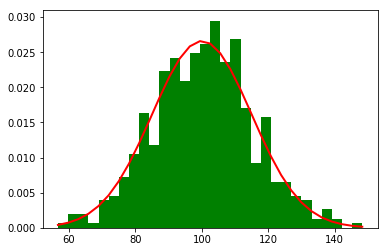

In [36]:
count, bins, ignored = plt.hist(iq_scores, bins=30, color= 'green', normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')